## Project - LLM-Powered Clickbait Detector

Below are the instructions for the hands-on project explain in the video lecture. The goal is to build an LLM-powered clickbait detector

---

#### Headline examples and their categories

Feel free to add more headlines to the list

```
"This celebrity's diet secret will SHOCK you!" (Clickbait)
"You won't believe what happened next – video inside!" (Clickbait)
"Is the moon actually made of cheese? The truth revealed!" (Clickbait)
"Doctors are stunned by this one weird trick to lose weight!" (Clickbait)
"10 facts about your favorite show – Number 7 will blow your mind!" (Clickbait)
"NASA to Launch New Mars Rover Next Month." (Non-Clickbait)
"Federal Reserve Increases Interest Rates by 0.5%." (Non-Clickbait)
"Recent Studies Show Coffee May Have Health Benefits." (Non-Clickbait)
"A Comprehensive Review of the Latest Smartphone Models." (Non-Clickbait)
"UN Climate Summit to Begin in Paris Next Week." (Non-Clickbait)
"How to Make Homemade Explosives!" (Unsafe)
"The Secret Art of Digital Hacking – A Guide!" (Unsafe)
"10 Easy Ways to Commit Fraud and Get Rich Quick!" (Unsafe)
"Why Vaccines are the Biggest Scam in Medical History!" (Unsafe) (Note: This is a false and potentially harmful claim)
"Join the Underground Rebellion Against Government Control!" (Unsafe)
"10 celebrities who hate each other – Number 5 will make you gasp!" (Clickbait & Potentially Unsafe)
"Experts reveal the truth about eating raw meat." (Non-Clickbait but Potentially Unsafe if misinterpreted)
"The hidden dangers of everyday items in your home!" (Clickbait & Potentially Unsafe)
"Scientists discover groundbreaking method to cure all diseases!" (Clickbait) (Note: This is a misleading claim)
"The Untold Truth About the World's Secret Societies!" (Clickbait & Potentially Unsafe)
```

In [2]:
import pandas as pd

In [3]:
titles_array = [
    {"title": "This celebrity's diet secret will SHOCK you!", "target": "Clickbait"},
    {"title": "You won't believe what happened next – video inside!", "target": "Clickbait"},
    {"title": "Is the moon actually made of cheese? The truth revealed!", "target": "Clickbait"},
    {"title": "Doctors are stunned by this one weird trick to lose weight!", "target": "Clickbait"},
    {"title": "10 facts about your favorite show – Number 7 will blow your mind!", "target": "Clickbait"},
    {"title": "10 celebrities who hate each other – Number 5 will make you gasp!", "target": "Clickbait & Potentially Unsafe"},
    {"title": "The hidden dangers of everyday items in your home!", "target": "Clickbait & Potentially Unsafe"},
    {"title": "Scientists discover groundbreaking method to cure all diseases!", "target": "Clickbait"},
    {"title": "The Untold Truth About the World's Secret Societies!", "target": "Clickbait & Potentially Unsafe"},
    {"title": "NASA to Launch New Mars Rover Next Month.", "target": "Non-Clickbait"},
    {"title": "Federal Reserve Increases Interest Rates by 0.5%.", "target": "Non-Clickbait"},
    {"title": "Recent Studies Show Coffee May Have Health Benefits.", "target": "Non-Clickbait"},
    {"title": "A Comprehensive Review of the Latest Smartphone Models.", "target": "Non-Clickbait"},
    {"title": "UN Climate Summit to Begin in Paris Next Week.", "target": "Non-Clickbait"},
    {"title": "Experts reveal the truth about eating raw meat.", "target": "Non-Clickbait but Potentially Unsafe"},
    {"title": "How to Make Homemade Explosives!", "target": "Unsafe"},
    {"title": "The Secret Art of Digital Hacking – A Guide!", "target": "Unsafe"},
    {"title": "10 Easy Ways to Commit Fraud and Get Rich Quick!", "target": "Unsafe"},
    {"title": "Why Vaccines are the Biggest Scam in Medical History!", "target": "Unsafe"},
    {"title": "Join the Underground Rebellion Against Government Control!", "target": "Unsafe"}
]


In [4]:
pip install groq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.6 MB/s eta 0:00:00


In [5]:
pip install comet_ml


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 648.9/648.9 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 277.3/277.3 kB 24.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.3/54.3 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 979.1/979.1 kB 41.2 MB/s eta 0:00:00
  Attempting uninstall: websocket-client
    Found existing installation: websocket-client 1.8.0
    Uninstalling websocket-client-1.8.0:
      Successfully uninstalled websocket-client-1.8.0
  Attempting uninstall: python-box
    Found existing installation: python-box 7.1.1
    Uninstalling python-box-7.1.1:
      Successfully uninstalled python-box-7.1.1


In [6]:
pip install gpt2


In [7]:
COMET_API_KEY = "McSgr3lw2lDTIS8XbPsJUUIwO"
COMET_PROJECT_NAME = "project-clickbait-detector"
COMET_WORK_SPACE = "edvardks"

Import comet_ml at the top of your code and define your Experiment Class.



In [8]:
from comet_ml import Experiment
from comet_ml.integration.pytorch import log_model

experiment = Experiment(
  api_key = COMET_API_KEY,
  project_name = COMET_PROJECT_NAME,
  workspace= COMET_WORK_SPACE
)

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Couldn't find a Git repository in '/content' nor in any parent directory. Set `COMET_GIT_DIRECTORY` if your Git Repository is elsewhere.
COMET INFO: Experiment is live on comet.com https://www.comet.com/edvardks/project-clickbait-detector/dbc7fa020af24fb1a1acdb96bc8a8052



Log all your data through the Experiment class during your training loop or after.



In [9]:
# Report multiple hyperparameters using a dictionary:
hyper_params = {
   "learning_rate": 0.5,
   "steps": 100000,
   "batch_size": 50,
}
experiment.log_parameters(hyper_params)

# Initialize and train your model
# model = TheModelClass()
# train(model)

# Seamlessly log your Pytorch model
#log_model(experiment, model=model, model_name="TheModel")

## Proyecto

### Step 1

Preprarar los mensajes e un Json

especificar las instrucciones y criterios de qué es un clickbait en su mensaje

In [10]:
df_json = pd.DataFrame(titles_array)
df_json["target"].value_counts()

target
Clickbait                               6
Non-Clickbait                           5
Unsafe                                  5
Clickbait & Potentially Unsafe          3
Non-Clickbait but Potentially Unsafe    1
Name: count, dtype: int64

Después de pasar nuestro conjunto proporcionado por Udacity, vemos cómo hay sesgos en nuestro dataset. Vamos a continuar de esta manera, y más adelante si lo veo necesario, añadiré más titulos, para eliminar esos Sesgos.

After passing our set provided by Udacity, we see how there are biases in our data set. We are going to continue in this way, and later if I see it necessary, I will add more titles, to eliminate those Biases.

In [11]:
# https://api.groq.io/auth/login
API_KEY_GROQ = "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"

In [12]:
import os

from groq import Groq

client = Groq(
    api_key=API_KEY_GROQ,
)

chat_completion = client.chat.completions.create(
    messages=[
        {
            "role": "user",
            "content": "Explain the importance of fast language models",
        }
    ],
    model="mixtral-8x7b-32768",
)

print(chat_completion.choices[0].message.content)

Fast language models are important for several reasons:

1. Real-time applications: Fast language models are essential for real-time applications such as chatbots, speech recognition, and machine translation. These applications require quick and accurate responses, making it necessary for the language model to process and generate language rapidly.

2. Cost-effective: Fast language models can significantly reduce the cost of natural language processing (NLP) tasks. Training and deploying large language models can be computationally expensive, and fast models can help reduce these costs.

3. User experience: Fast language models can improve the user experience by providing quick and accurate responses. Slow language models can lead to user frustration and decreased engagement.

4. Scalability: Fast language models can handle larger volumes of data and can be scaled up to handle more complex NLP tasks. This scalability is critical for applications that require real-time processing of lar

In [13]:
titles_array[0]['title']

"This celebrity's diet secret will SHOCK you!"

In [14]:
def get_completion(messages, model="mixtral-8x7b-32768", temperature=0, max_tokens=300):

    prompt = messages


    response = client.chat.completions.create(
        model=model,
        messages=prompt,
        temperature=temperature,
        max_tokens=max_tokens,
    )

    # print("\n\n\n EDU: \n" + str(response.choices[0].message.content) + " \n\n\n")
    return response.choices[0].message.content

In [15]:
def get_only_response(response):
    # print(response)
    system_message_2 = """
Please analyze the title provided and classify it into one of the following categories: Clickbait, Non-clickbait, Potentially Dangerous, Dangerous. Your task is to determine whether the answer is misleading, non-misleading, potentially dangerous, or actually dangerous. You don't need to provide additional details; only the main category is enough.
Important, just return the rating to me, without additional explanations.
title: {response}
"""

    system_message_3 = """
Por favor, analiza el titulo proporcionado y clasifícala en una de las siguientes categorías: Clickbait, Non-clickbait, Potencialmente Peligrosa, Peligrosa. Tu tarea es determinar si la respuesta es engañosa, no engañosa, potencialmente peligrosa o realmente peligrosa. No necesitas proporcionar detalles adicionales; solo la categoría principal es suficiente.
importante, solo devuelveme la clasificación, sin explicaciones adicionales.
titulo: {response}
"""
    messages = [
      {
        "role": "system",
        "content": system_message_3.format(response=response)
      }
    ]
    return get_completion(messages,temperature=0, max_tokens=20)


In [16]:
chatbot_responses = []
for item in titles_array:
    response = get_only_response(item["title"])
    # print("Title:\t", item["title"])
    # print("Predicted Target:", response)
    # # print("\nActual Target:\t", item["target"])
    # print("---------------------")
    # break
    chatbot_responses.append({"title":item["title"],"predictedTarget":response})

### Here we can see the unique values in all our dict of predictions
# The obejtive is correct this sesgos:
"""
{
 'Clickbait',
 'Clickbait & Potentially Unsafe',
 'Potential unsafe',
 'clickbait',
 'non-clickbait',
 "non-clickbait\n\nThe title 'Federal Reserve Increases Interest Rates by "} ### This is a bad response
"""
s = set()
for dic in chatbot_responses:
    s.add(dic['predictedTarget'])
s


{'Clickbait', 'Non-clickbait', 'Peligrosa', 'Potencialmente Peligrosa'}

In [17]:
for item in titles_array:
  for predicted in chatbot_responses:
    if predicted['title'] == item['title']:
      print(" PREDICTED      ORIGINAL")
      print(predicted['predictedTarget']+ "  /  "+item['target']+"\n-----------")

 PREDICTED      ORIGINAL
Clickbait  /  Clickbait
-----------
 PREDICTED      ORIGINAL
Clickbait  /  Clickbait
-----------
 PREDICTED      ORIGINAL
Clickbait  /  Clickbait
-----------
 PREDICTED      ORIGINAL
Clickbait  /  Clickbait
-----------
 PREDICTED      ORIGINAL
Clickbait  /  Clickbait
-----------
 PREDICTED      ORIGINAL
Clickbait  /  Clickbait & Potentially Unsafe
-----------
 PREDICTED      ORIGINAL
Potencialmente Peligrosa  /  Clickbait & Potentially Unsafe
-----------
 PREDICTED      ORIGINAL
Peligrosa  /  Clickbait
-----------
 PREDICTED      ORIGINAL
Clickbait  /  Clickbait & Potentially Unsafe
-----------
 PREDICTED      ORIGINAL
Non-clickbait  /  Non-Clickbait
-----------
 PREDICTED      ORIGINAL
Non-clickbait  /  Non-Clickbait
-----------
 PREDICTED      ORIGINAL
Non-clickbait  /  Non-Clickbait
-----------
 PREDICTED      ORIGINAL
Non-clickbait  /  Non-Clickbait
-----------
 PREDICTED      ORIGINAL
Non-clickbait  /  Non-Clickbait
-----------
 PREDICTED      ORIGINAL
Non

## Evaluation

In [18]:

s = set()
for dic in chatbot_responses:
    s.add(dic['predictedTarget'])
s


{'Clickbait', 'Non-clickbait', 'Peligrosa', 'Potencialmente Peligrosa'}

In [19]:
# mapeo los resultados
completion_map = {
    "Clickbait": 0,
    "Non-Clickbait": 1,
    "Unsafe": 2,
    "Potentially Unsafe": 3,
    "Clickbait & Potentially Unsafe": 4,
    "Non-Clickbait but Potentially Unsafe": 5
}
completion_map_es = {
    "Clickbait": 0,
    "Non-clickbait": 1,
    "Peligrosa": 2,
    "Potencialmente Peligrosa": 3,
    "Clickbait & Potentially Unsafe": 4,
    "Non-Clickbait but Potentially Unsafe": 5
}
completion_map_string = {
    0: "Clickbait",
    1: "Non-Clickbait",
    2: "Unsafe",
    3: "Potentially Unsafe",
    4: "Clickbait & Potentially Unsafe",
    5: "Non-Clickbait but Potentially Unsafe",
}

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
# Lista para almacenar los valores de 'target'
valores_target = []

# Iterar sobre el diccionario y agregar los valores de 'target' a la lista
for item in titles_array:
    if 'target' in item:
        valores_target.append(item['target'])

actual_completions_int = [completion_map[completion] for completion in valores_target]

In [22]:
# Lista para almacenar los valores de 'target'
valores_target_p = []

# Iterar sobre el diccionario y agregar los valores de 'target' a la lista
for item in chatbot_responses:
    if 'predictedTarget' in item:
        # print(item['predictedTarget'])
        valores_target_p.append(item['predictedTarget'])

response_completions_int = [completion_map_es[completion] for completion in valores_target_p]

In [23]:
response_completions_int

[0, 0, 0, 0, 0, 0, 3, 2, 0, 1, 1, 1, 1, 1, 1, 2, 0, 2, 2, 2]

In [24]:
actual_completions_int

[0, 0, 0, 0, 0, 4, 4, 0, 4, 1, 1, 1, 1, 1, 5, 2, 2, 2, 2, 2]

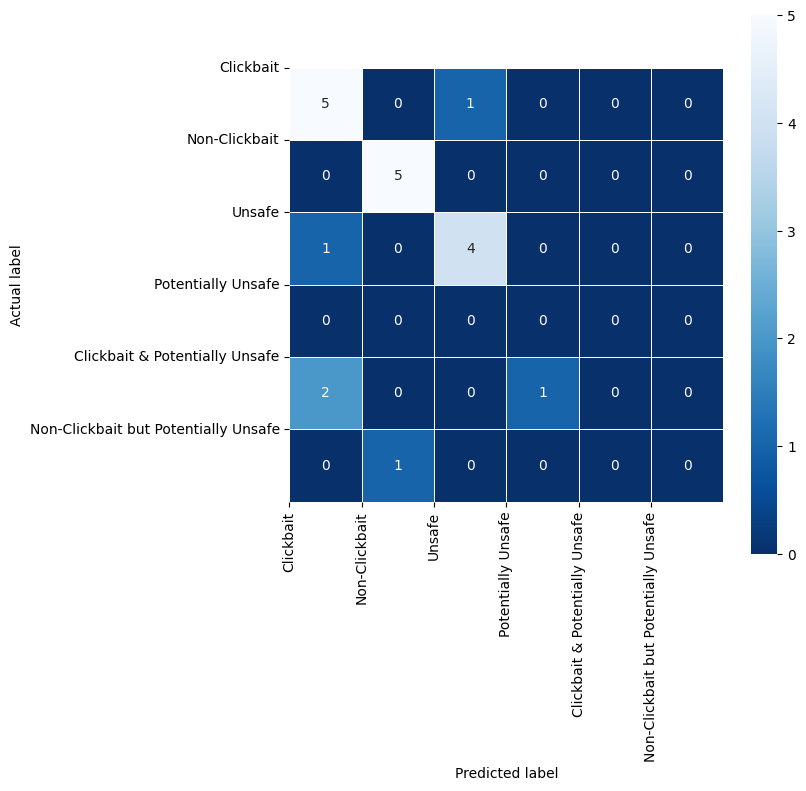

In [25]:
cm = confusion_matrix(actual_completions_int, response_completions_int)

# plot confusion matrix
plt.figure(figsize=(7,7))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=0.5, square=True, cmap="Blues_r")

# add emotion labels to confusion matrix
plt.ylabel("Actual label")
plt.xlabel("Predicted label")

# annotate the confusion matrix with completion labels
tick_marks = [i for i in range(len(completion_map_string))];
plt.xticks(tick_marks, list(completion_map_string.values()), rotation="vertical");
plt.yticks(tick_marks, list(completion_map_string.values()), rotation="horizontal");

## Vamos a exportar estos logs a comet

In [29]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Suponiendo que 'actual_completions_int' son las etiquetas reales y 'response_completions_int' son las predicciones.
cm = confusion_matrix(actual_completions_int, response_completions_int)

# Calcular la precisión
precision = precision_score(actual_completions_int, response_completions_int, average='weighted')

# Calcular el recall
recall = recall_score(actual_completions_int, response_completions_int, average='weighted')

# Calcular el F1-score (una medida combinada de precisión y recall)
f1 = f1_score(actual_completions_int, response_completions_int, average='weighted')

# Imprimir las métricas
print("Precisión:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Precisión: 0.5958333333333334
Recall: 0.7
F1-score: 0.6415584415584416


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
"""

experiment = Experiment(
  api_key = COMET_API_KEY,
  project_name = COMET_PROJECT_NAME,
  workspace= COMET_WORK_SPACE
)

"""

In [42]:
experiment.log_confusion_matrix(y_predicted=response_completions_int, y_true=actual_completions_int)

{'web': 'https://www.comet.com/api/asset/download?assetId=b0855fd07cd74ab6ae00a3463aea3485&experimentKey=dbc7fa020af24fb1a1acdb96bc8a8052',
 'api': 'https://www.comet.com/api/rest/v2/experiment/asset/get-asset?assetId=b0855fd07cd74ab6ae00a3463aea3485&experimentKey=dbc7fa020af24fb1a1acdb96bc8a8052',
 'assetId': 'b0855fd07cd74ab6ae00a3463aea3485'}

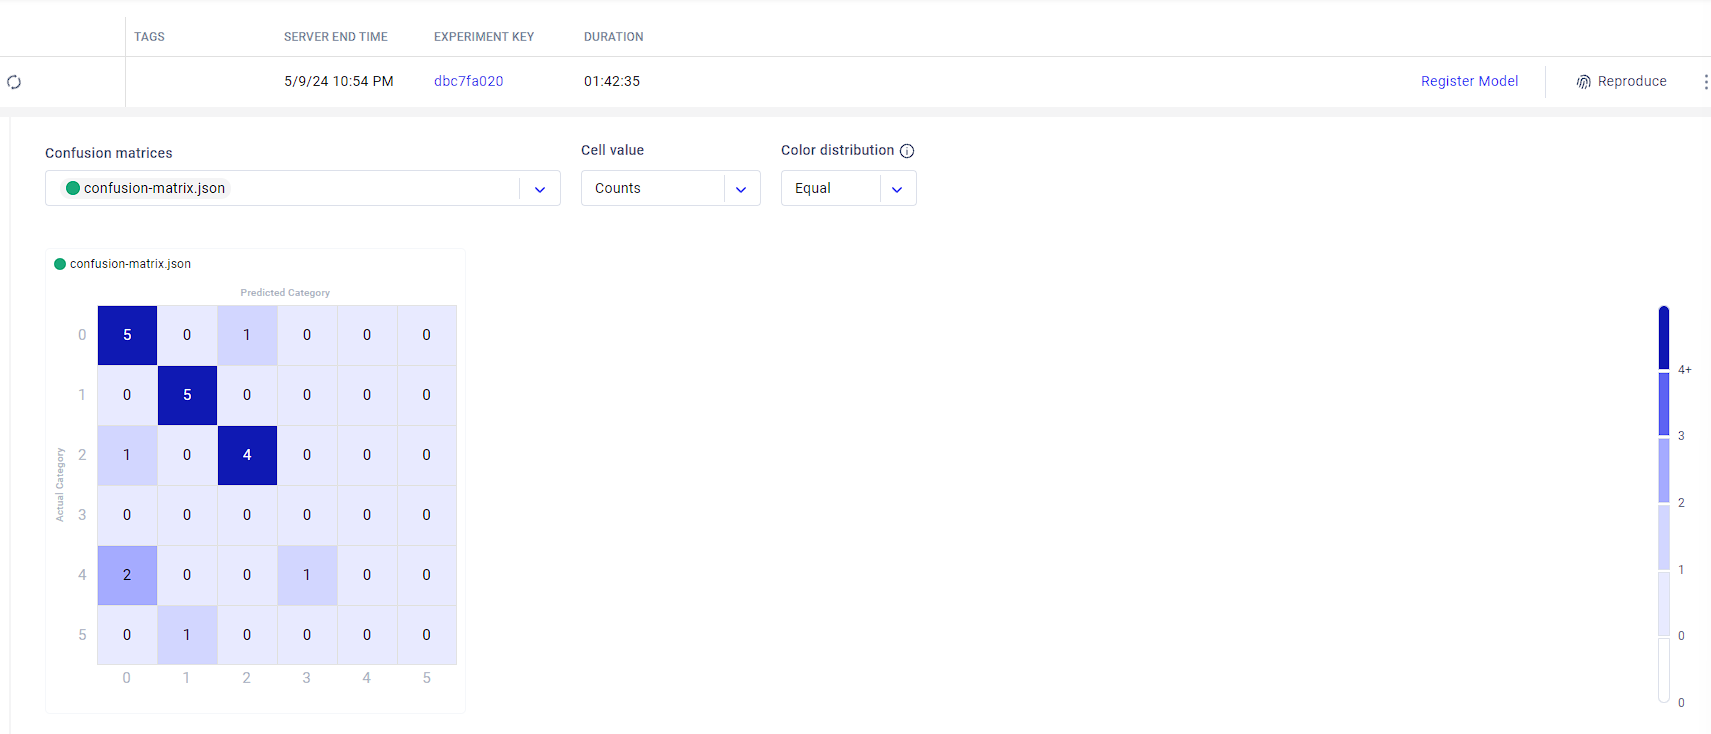

In [30]:
# Supongamos que 'precision', 'recall' y 'f1_score' son las métricas que quieres registrar.
experiment.log_metric("Precision", precision)
experiment.log_metric("Recall", recall)
experiment.log_metric("F1-score", f1_score)


COMET WARNING: Converting metric value '<function f1_score at 0x7809e7700790>' into a string using str(), resulting string might be invalid


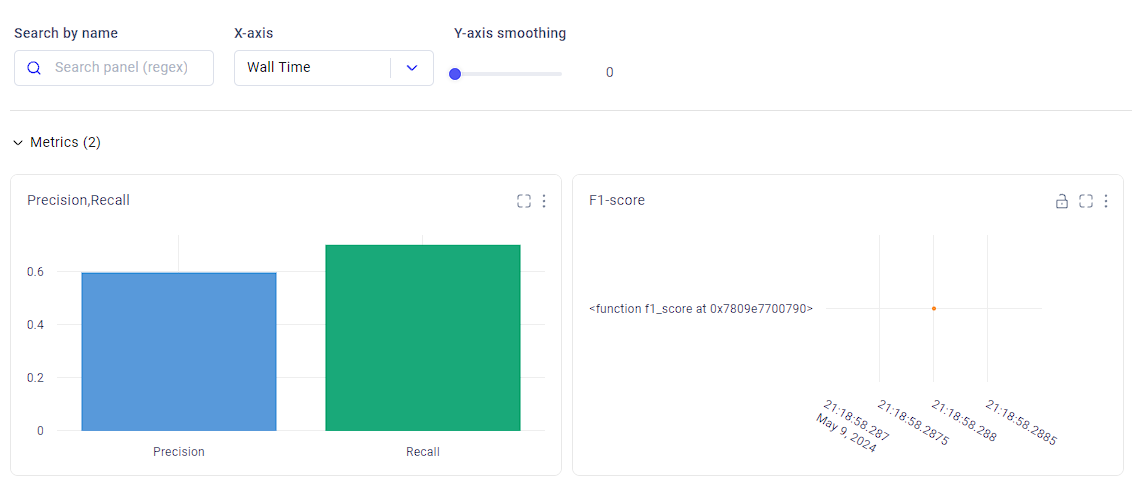

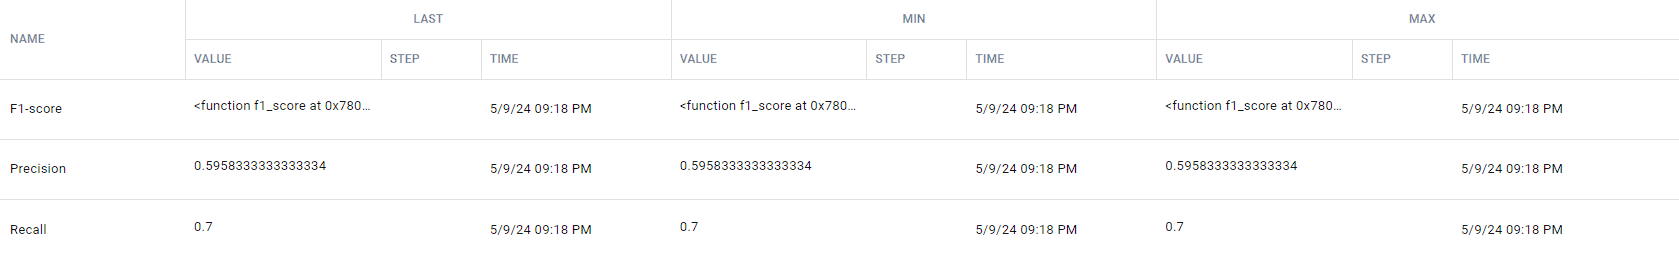

COMET WARNING: Failing to save the matplotlib figure


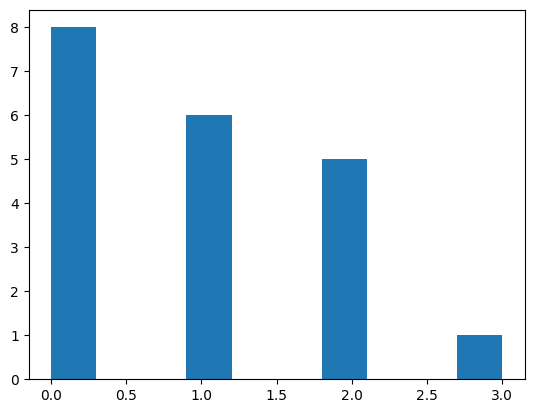

In [33]:
# Supongamos que 'distribucion_predicciones' es un gráfico de distribución de las predicciones de tu modelo.
distribucion_predicciones = plt.hist(response_completions_int)

# Ahora puedes registrar este gráfico en Comet.
experiment.log_figure(figure_name="Distribucion de Predicciones", figure=distribucion_predicciones)

In [37]:
# Supongamos que tienes ejemplos de títulos clasificados como clickbait y no clickbait.
ejemplos_clickbait = []
ejemplos_no_clickbait = []

for i in titles_array:
  if i["target"] == "Non-Clickbait":
    ejemplos_clickbait.append(i['title'])
  else:
    ejemplos_no_clickbait.append(i['title'])

experiment.log_text("Ejemplos de Clickbait", "\n".join(ejemplos_clickbait))
experiment.log_text("Ejemplos de No Clickbait", "\n".join(ejemplos_no_clickbait))

# log_model(experiment, model=model, model_name="TheModel_re")

COMET WARNING: Passed step value 'NASA to Launch New Mars Rover Next Month.\nFederal Reserve Increases Interest Rates by 0.5%.\nRecent Studies Show Coffee May Have Health Benefits.\nA Comprehensive Review of the Latest Smartphone Models.\nUN Climate Summit to Begin in Paris Next Week.' is not a number, ignoring it
COMET WARNING: Passed step value "This celebrity's diet secret will SHOCK you!\nYou won't believe what happened next – video inside!\nIs the moon actually made of cheese? The truth revealed!\nDoctors are stunned by this one weird trick to lose weight!\n10 facts about your favorite show – Number 7 will blow your mind!\n10 celebrities who hate each other – Number 5 will make you gasp!\nThe hidden dangers of everyday items in your home!\nScientists discover groundbreaking method to cure all diseases!\nThe Untold Truth About the World's Secret Societies!\nExperts reveal the truth about eating raw meat.\nHow to Make Homemade Explosives!\nThe Secret Art of Digital Hacking – A Guide

{'web': 'https://www.comet.com/api/asset/download?assetId=b8eb90eceb6049e2b73e83204a259c1a&experimentKey=dbc7fa020af24fb1a1acdb96bc8a8052',
 'api': 'https://www.comet.com/api/rest/v2/experiment/asset/get-asset?assetId=b8eb90eceb6049e2b73e83204a259c1a&experimentKey=dbc7fa020af24fb1a1acdb96bc8a8052',
 'assetId': 'b8eb90eceb6049e2b73e83204a259c1a'}

# other metrics

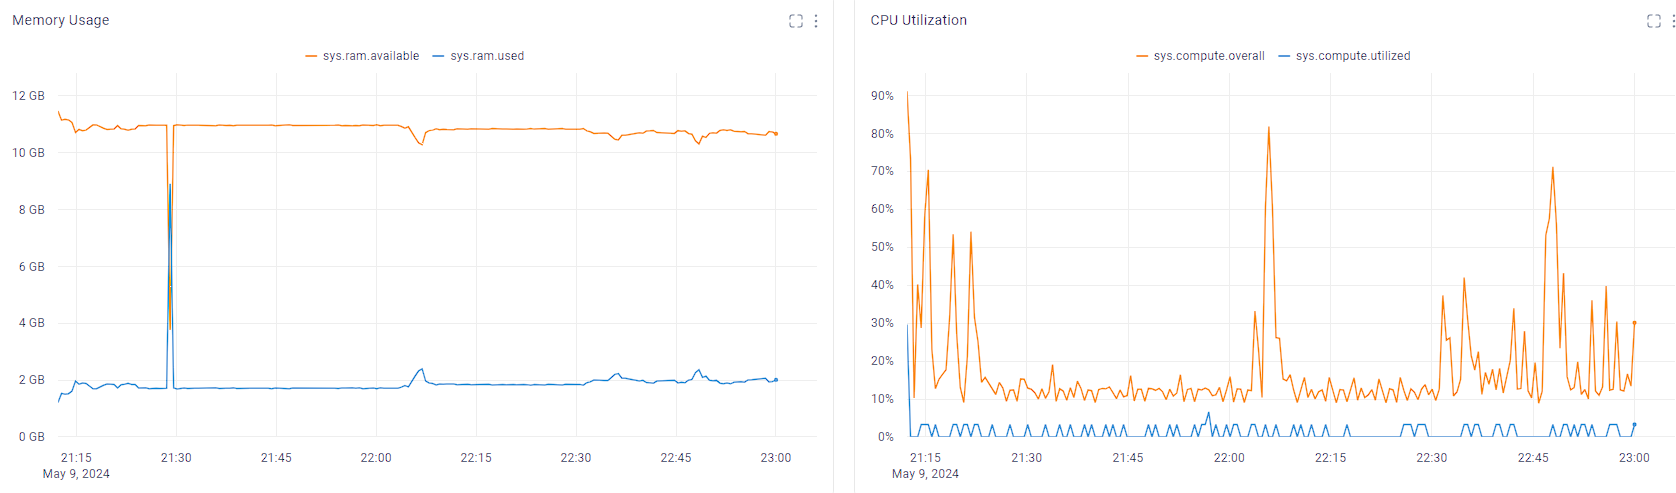

In [43]:
# finaliza el experimento.
experiment.end()

COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     name                  : strong_taxi_2315
COMET INFO:     url                   : https://www.comet.com/edvardks/project-clickbait-detector/dbc7fa020af24fb1a1acdb96bc8a8052
COMET INFO:   Metrics:
COMET INFO:     F1-score  : <function f1_score at 0x7809e7700790>
COMET INFO:     Precision : 0.5958333333333334
COMET INFO:     Recall    : 0.7
COMET INFO:   Parameters:
COMET INFO:     batch_size    : 50
COMET INFO:     learning_rate : 0.5
COMET INFO:     steps         : 100000
COMET INFO:   Uploads:
COMET INFO:     confusion-matrix    : 1
COMET INFO:     environment details : 1
COMET INFO:     filename            : 1
COMET INFO:     installed packages  : 1
COMET INFO:     noteboo

## Posibles pasos -> Actualizar los clickbites y peligrosos a textos seguros

## Posible paso -> Hacer fine-tunning de un modelo (Flan-T5-Base) y con este predecir mejor y conseguir cambiar los titulos más efectivamente